# Introduction

La librairie $pandas$ est l'une des bibliothèques les plus puissantes et populaires pour l'analyse de données en $Python$. Elle est particulièrement utilisée en science des données, en finance, en statistiques et dans tout domaine nécessitant le traitement de grandes quantités de données structurées.

Imaginons que nous souhaitions représenter des animaux. Disons... des pandas par exemple !
Nous pouvons caractériser un panda par sa taille ; ou plutôt, par ses tailles : disons par exemple, la longueur du corps, la hauteur de la hanche, la hauteur de l'épaule, et le périmètre thoracique.
On peut représenter ce panda par une liste :

In [2]:
un_panda = [100, 40, 42, 61]
un_panda

[100, 40, 42, 61]

Ici, notre panda a une longueur du corps de 180 cm, une hauteur de la hanche de 77cm, une hauteur de l'épaule de 81 cm et un périmètre thoracique de 106 cm de diamètre.
Si on veut représenter plusieurs pandas, on crée une liste de listes :

In [3]:
# Famille panda
famille_panda = [
    [149, 64, 67, 86], #maman
    [51, 21, 25, 45], #bébé
    [180, 77, 81, 106] #papa
]

famille_panda

[[149, 64, 67, 86], [51, 21, 25, 45], [180, 77, 81, 106]]

Par exemple, supposons qu'on veuille obtenir la longueur du corps (situé en position 0 dans chaque liste qui décrit un panda) du panda situé en position 2 dans ma liste (c'est-à-dire papa panda).

In [5]:
#longueur du corps de papa panda
famille_panda[2][0]

180

In [6]:
#Pour connaître la longueur du corps de toute la famille panda
for i in range(3):
    print(famille_panda[i][0])

149
51
180


C'est assez pratique certes, mais ce n'est pas très explicite. On aimerait pouvoir spécifier les noms des variables caractéristiques d'un panda.
Cela nous amène à la librairie ***pandas***.

In [1]:
# importation de la librairie
import pandas

# DataFrame

est l'objet principal de la bibliothèque pandas, utilisé pour représenter des données tabulaires en 2 dimensions.

In [4]:
# Création d'une dataframe à partir d'une liste

famille_panda_df = pandas.DataFrame(famille_panda)
famille_panda_df

,0,1,2,3
0,149,64,67,86
1,51,21,25,45
2,180,77,81,106


On peut faire mieux :

In [5]:
famille_panda_df = pandas.DataFrame(famille_panda,
                               columns = ['corps', 'hanche', 'épaules', 'thorax'],
                               index = ['maman', 'bébé', 'papa'])

famille_panda_df

,corps,hanche,épaules,thorax
maman,149,64,67,86
bébé,51,21,25,45
papa,180,77,81,106


Le nom des lignes est appelé index. Un index peut être une chaîne de caractères ou un nombre entier. Quand aucun index n'est spécifié à la création du dataframe, il est initialisé par défaut avec une suite continue d'entiers commençant par 0.

Voici quelques petites fonctionnalités des $DataFrames$.

Tout d'abord, accédons à la colonne *thorax* de notre table :

In [9]:
famille_panda_df['thorax']

maman     86
bébé      45
papa     106
Name: thorax, dtype: int64

Accédons maintenant au $papa$ panda : d'abord par sa position (position 2), puis par son nom $'papa'$. Le résultat renvoyé est exactement le même dans les 2 cas.

In [6]:
# indexation positionnelle

famille_panda_df.iloc[2]

corps      180
hanche      77
épaules     81
thorax     106
Name: papa, dtype: int64

In [7]:
# indexation par label

famille_panda_df.loc['papa']

corps      180
hanche      77
épaules     81
thorax     106
Name: papa, dtype: int64

Déterminons les pandas dont le diamètre du thorax est supérieur à 100 (Filtration de données) :

In [8]:
filtre = famille_panda_df['thorax'] > 100

famille_panda_df[filtre]

,corps,hanche,épaules,thorax
papa,180,77,81,106


# Fichier CSV

Un fichier CSV (pour Comma-Separated Values) est un fichier texte utilisé pour stocker des données tabulaires, où chaque ligne représente un enregistrement de valeurs séparées par des virgules.

La librairie $pandas$ permet d'analyser des données sous format $csv$ en utilisant les $DataFrames$.

## Exemple

Soit le fichier $activities.csv$ contenant des statistiques sur des activités sportives (Durée, fréquence cardiaque moyenne et maximale, calories brûlées) :

In [48]:
# Lecture et importation des données

df_sport = pandas.read_csv('activities.csv')

In [49]:
# La première chose à faire est de jeter un rapide coup d'oeil à notre dataframe en affichant quelques informations
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


Le résultat ci-dessus nous renseigne sur les noms des colonnes, le nombre de valeurs non manquantes par colonne (implicitement le nombre de valeurs manquantes par colonne), le type des valeurs dans chaque colonne, la mémoire utilisée par ces données, le nombre de lignes et de colonnes, etc.    

In [50]:
#Affichage des premières lignes (5 par défaut)

df_sport.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [51]:
df_sport.head(3)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0


In [52]:
#de même pour les dernières lignes

df_sport.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [53]:
df_sport.tail(10)

,Duration,Pulse,Maxpulse,Calories
159,30,80,120,240.9
160,30,85,120,250.4
161,45,90,130,260.4
162,45,95,130,270.0
163,45,100,140,280.9
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


On peut aussi regarder un mélange de lignes d'un tableau de données :

In [54]:
# Échantillon aléatoire de la dataframe

df_sport.sample(7)

,Duration,Pulse,Maxpulse,Calories
150,60,106,134,343.0
88,45,129,103,242.0
0,60,110,130,409.1
13,60,104,132,379.3
64,20,110,130,131.4
112,15,124,139,124.2
31,45,90,112,180.1


In [55]:
# Sélection d'une colonne

df_sport['Pulse']

0      110
1      117
2      103
3      109
4      117
      ... 
164    105
165    110
166    115
167    120
168    125
Name: Pulse, Length: 169, dtype: int64

In [56]:
# Sélection avec une condition

condition1 = df_sport['Pulse'] > 150

df_sport[condition1]

,Duration,Pulse,Maxpulse,Calories
58,20,153,172,226.4
80,30,159,182,319.2
85,30,151,170,300.0
95,20,151,168,229.4
97,25,152,168,244.2


In [57]:
condition2 = (df_sport['Pulse'] > 130) & (df_sport['Duration']<60)

df_sport[condition2]

,Duration,Pulse,Maxpulse,Calories
54,30,136,175,238.0
58,20,153,172,226.4
80,30,159,182,319.2
81,45,149,169,344.0
85,30,151,170,300.0
94,20,150,171,127.4
95,20,151,168,229.4
97,25,152,168,244.2
135,20,136,156,189.0
139,20,141,162,222.4


In [58]:
# On peut également obtenir un classement par ordre croissant des valeurs d’une colonne.
df_sport.sort_values('Maxpulse')

,Duration,Pulse,Maxpulse,Calories
103,90,90,100,500.4
93,15,80,100,50.5
102,90,90,100,500.0
22,60,130,101,300.0
88,45,129,103,242.0
...,...,...,...,...
58,20,153,172,226.4
54,30,136,175,238.0
3,45,109,175,282.4
80,30,159,182,319.2


In [59]:
# ou décroissant 

df_sport.sort_values('Maxpulse', ascending=False)

,Duration,Pulse,Maxpulse,Calories
109,210,137,184,1860.4
80,30,159,182,319.2
54,30,136,175,238.0
3,45,109,175,282.4
58,20,153,172,226.4
...,...,...,...,...
88,45,129,103,242.0
22,60,130,101,300.0
103,90,90,100,500.4
93,15,80,100,50.5


### Indicateurs statistiques

Pour chaque colonne :
- **count()** renvoie le nombre de valeurs
- **median()** renvoie la liste des médianes
- **mean()** renvoie la liste des moyennes
- **std()** renvoie la liste des écarts-types
- **min()**, **max()**, **sum()**, ...

On dispose aussi de la fonction  ***describe()*** . Elle donne des statistiques diverses (moyenne, minimum, maximum, etc.) sur les données contenues dans chaque colonne.

In [60]:
df_sport.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


On obtient dans l’ordre le nombre de lignes, la moyenne, l’écart-type, la valeur minimale, le premier, deuxième et troisième quartiles et la valeur maximale par colonne.

In [61]:
# Il est possible de ne visualiser qu’une colonne. 

# Par exemple, pour n’avoir que les indicateurs de la colonne ’Pulse’.

df_sport['Pulse'].describe()

count    169.000000
mean     107.461538
std       14.510259
min       80.000000
25%      100.000000
50%      105.000000
75%      111.000000
max      159.000000
Name: Pulse, dtype: float64

# Représentation graphique

Soit le fichier $countries.csv$ contenant des statistiques sur l'espérance de vie, population et PIB de différents pays entre 1952 et 2007.

In [13]:
import matplotlib.pyplot as mpl

#importation des données
df_pays = pandas.read_csv('countries.csv')

#Un extrait de la table
df_pays.sample(7)

,Country,Continent,Year,LifeExp,Population,GDPPerCap
1434,Swaziland,Africa,1962.0,44.992,370006.0,1856.182125
247,Canada,Americas,1987.0,76.860,26549700.0,26626.515030
1040,Nepal,Asia,1972.0,43.971,12412593.0,674.788130
117,Belgium,Europe,1997.0,77.530,10199787.0,27561.196630
801,Kenya,Africa,1977.0,56.155,14500404.0,1267.613204
1583,United Kingdom,Europe,1987.0,75.007,56981620.0,21664.787670
1069,New Zealand,Oceania,1997.0,77.550,3676187.0,21050.413770


In [15]:
#affichage des lignes concernant le maroc

pays1 = 'Morocco'
condition1 = df_pays['Country'] == pays1

df1 = df_pays[condition1]

df1

,Country,Continent,Year,LifeExp,Population,GDPPerCap
988,Morocco,Africa,1952.0,42.873,9939217.0,1688.203570
989,Morocco,Africa,1957.0,45.423,11406350.0,1642.002314
990,Morocco,Africa,1962.0,47.924,13056604.0,1566.353493
991,Morocco,Africa,1967.0,50.335,14770296.0,1711.044770
992,Morocco,Africa,1972.0,52.862,16660670.0,1930.194975
993,Morocco,Africa,1977.0,55.730,18396941.0,2370.619976
994,Morocco,Africa,1982.0,59.650,20198730.0,2702.620356
995,Morocco,Africa,1987.0,62.677,22987397.0,2755.046991
996,Morocco,Africa,1992.0,65.393,25798239.0,2948.047252
997,Morocco,Africa,1997.0,67.660,28529501.0,2982.101858


Text(0, 0.5, 'PIB')

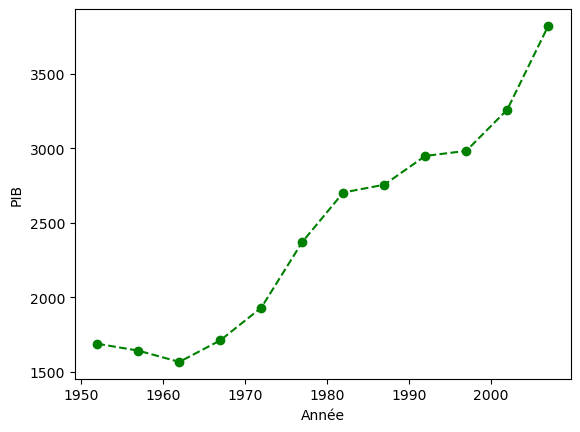

In [14]:
# Exprimer graphiquement le PIB en fonction des années 

mpl.plot(df1['Year'], df1['GDPPerCap'], 'go--')
mpl.xlabel('Année')
mpl.ylabel('PIB')

In [11]:
#Affichage des payés concernés 
df_pays['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Lebanon', 'Liberia', 'Libya',
       'Madagascar'

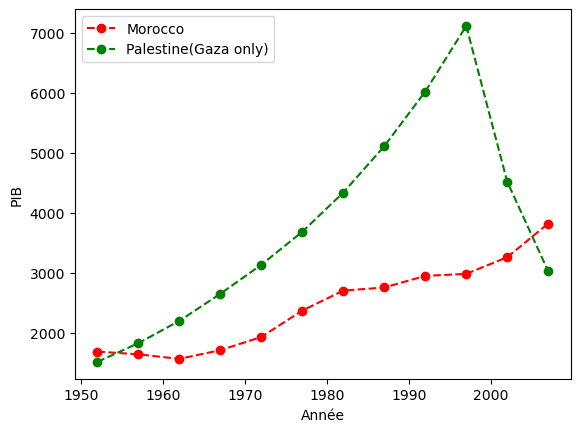

In [16]:
pays2 = 'Palestine(Gaza only)'

df2 = df_pays[df_pays['Country']==pays2]

#Tracer plusieurs courbes en même temps

mpl.plot(df1['Year'], df1['GDPPerCap'], 'ro--', label=pays1)
mpl.plot(df2['Year'], df2['GDPPerCap'], 'go--', label=pays2) 
mpl.xlabel('Année')
mpl.ylabel('PIB')
mpl.legend() 

In [17]:
# Affichage des statistiques de l'année 2007

df_2007 = df_pays[df_pays['Year']==2007]
df_2007

,Country,Continent,Year,LifeExp,Population,GDPPerCap
11,Afghanistan,Asia,2007.0,43.828,31889923.0,974.580338
23,Albania,Europe,2007.0,76.423,3600523.0,5937.029526
35,Algeria,Africa,2007.0,72.301,33333216.0,6223.367465
47,Angola,Africa,2007.0,42.731,12420476.0,4797.231267
59,Argentina,Americas,2007.0,75.320,40301927.0,12779.379640
...,...,...,...,...,...,...
1623,Venezuela,Americas,2007.0,73.747,26084662.0,11415.805690
1635,Vietnam,Asia,2007.0,74.249,85262356.0,2441.576404
1647,"Yemen, Rep.",Asia,2007.0,62.698,22211743.0,2280.769906
1659,Zambia,Africa,2007.0,42.384,11746035.0,1271.211593


La moyenne en 2007 était  11711.115338724461 et l''écart-type  12898.583933569626
La médiane  en 2007 était  6223.367465


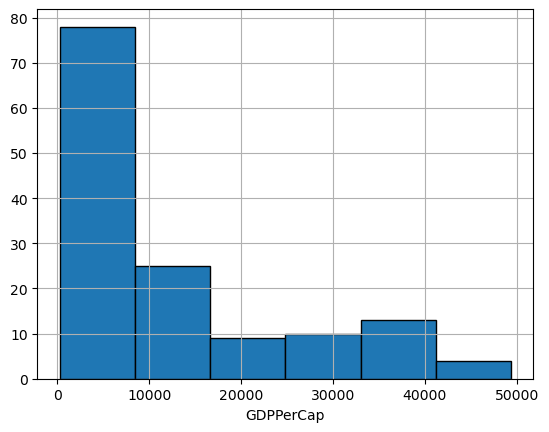

In [76]:
# Expression des statistiques en ce qui concerne le PIB en 2007 sous forme d'histogramme

mpl.hist(df_2007['GDPPerCap'], edgecolor='black', bins=6) #bins pour spécifier le nombre des barres
mpl.grid()
mpl.xlabel('GDPPerCap')

#Calcul de la moyenne et de l'écart-type

print("La moyenne en 2007 était ", df_2007['GDPPerCap'].mean(), "et l''écart-type ", df_2007['GDPPerCap'].std())

#Calcul de la médiane

print("La médiane  en 2007 était ", df_2007['GDPPerCap'].median())

<Axes: >

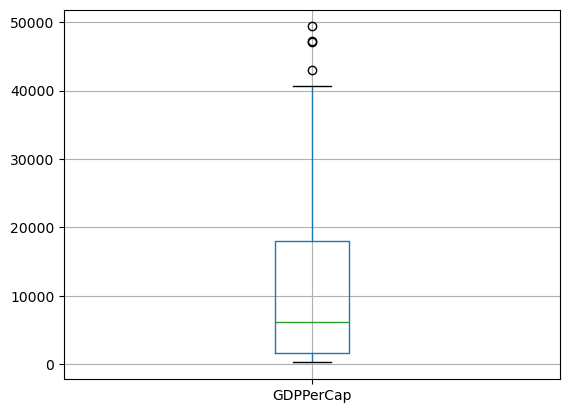

In [18]:
# Représentation en utilisant les quartiles avec la boîte à moustaches

df_2007.boxplot(column=['GDPPerCap'], grid=True)

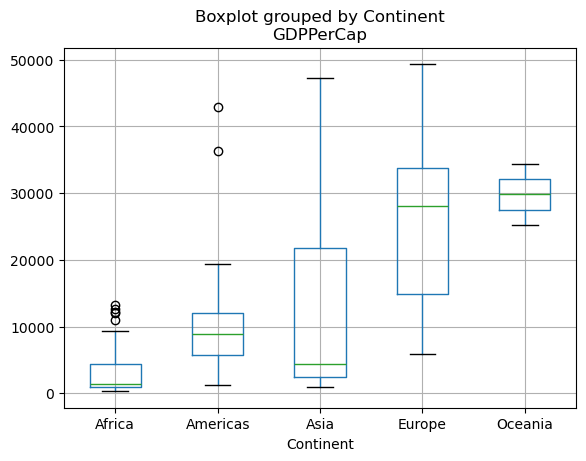

In [78]:
#représentation par continent 
df_2007.boxplot(by='Continent', column=['GDPPerCap'], grid=True);